# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:

from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:


file_name = 'Reacher_Linux/Reacher.x86_64'

env = UnityEnvironment(file_name=file_name)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:


from ddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import time
import torch

%matplotlib inline



def ddpg(n_episodes=5000, max_t=1000, solved_score=30.0, consec_episodes=100, print_every=1, train_mode=True,
         actor_path='actor.pth', critic_path='critic.pth'):

    mean_scores = []  # list of mean scores from each episode
    scores_window = deque(maxlen=consec_episodes)  # mean scores from most recent episodes
    avgs = []  # list of averages

    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=train_mode)[brain_name]  # reset environment
        states = env_info.vector_observations  # get current state for each agent
        scores = np.zeros(num_agents)  # initialize score for each agent
        agent.reset()
        start_time = time.time()
        for t in range(max_t):
            actions = agent.act(states, add_noise=True)  # select an action
            env_info = env.step(actions)[brain_name]  # send actions to environment
            next_states = env_info.vector_observations  # get next state
            rewards = env_info.rewards  # get reward
            dones = env_info.local_done  # see if episode has finished
            # save experience to replay buffer, perform learning step at defined interval
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done,t)
            states = next_states
            scores += rewards
            if np.any(dones):  # exit loop when episode ends
                break

        duration = time.time() - start_time
        mean_scores.append(np.mean(scores))  # save mean score for the episode
        scores_window.append(mean_scores[-1])  # save mean score to window
        avgs.append(np.mean(scores_window))  # save moving average

        if i_episode % print_every == 0:
            print('\rEpisode {} ({} sec)  -- \tMean Score ={:.1f} -- \t Avg: {:.1f}'.format( \
                i_episode, round(duration), mean_scores[-1], avgs[-1]))


        if avgs[-1] >= solved_score and i_episode >= consec_episodes:
            print('\nEnvironment SOLVED in {} episodes!\tMoving Average ={:.1f} over last {} episodes'.format( \
                i_episode - consec_episodes, mean_scores[-1], avgs[-1], consec_episodes))
            if train_mode:
                torch.save(agent.actor_local.state_dict(), actor_path)
                torch.save(agent.critic_local.state_dict(), critic_path)
            break

    return mean_scores, avgs



# run the training loop
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)
scores, avgs = ddpg()


Episode 1 (5 sec)  -- 	Mean Score =0.7 -- 	 Avg: 0.7


Episode 2 (6 sec)  -- 	Mean Score =0.3 -- 	 Avg: 0.5


Episode 3 (6 sec)  -- 	Mean Score =0.1 -- 	 Avg: 0.4


Episode 4 (6 sec)  -- 	Mean Score =1.3 -- 	 Avg: 0.6


Episode 5 (5 sec)  -- 	Mean Score =0.0 -- 	 Avg: 0.5


Episode 6 (6 sec)  -- 	Mean Score =0.4 -- 	 Avg: 0.5


Episode 7 (6 sec)  -- 	Mean Score =0.8 -- 	 Avg: 0.5


Episode 8 (5 sec)  -- 	Mean Score =0.3 -- 	 Avg: 0.5


Episode 9 (6 sec)  -- 	Mean Score =1.1 -- 	 Avg: 0.6


Episode 10 (6 sec)  -- 	Mean Score =2.2 -- 	 Avg: 0.7


Episode 11 (6 sec)  -- 	Mean Score =1.2 -- 	 Avg: 0.8


Episode 12 (6 sec)  -- 	Mean Score =0.6 -- 	 Avg: 0.8


Episode 13 (6 sec)  -- 	Mean Score =1.0 -- 	 Avg: 0.8


Episode 14 (6 sec)  -- 	Mean Score =0.1 -- 	 Avg: 0.7


Episode 15 (6 sec)  -- 	Mean Score =2.2 -- 	 Avg: 0.8


Episode 16 (6 sec)  -- 	Mean Score =0.8 -- 	 Avg: 0.8


Episode 17 (6 sec)  -- 	Mean Score =1.6 -- 	 Avg: 0.9


Episode 18 (5 sec)  -- 	Mean Score =1.0 -- 	 Avg: 0.9


Episode 19 (5 sec)  -- 	Mean Score =0.9 -- 	 Avg: 0.9


Episode 20 (6 sec)  -- 	Mean Score =1.2 -- 	 Avg: 0.9


Episode 21 (6 sec)  -- 	Mean Score =0.0 -- 	 Avg: 0.8


Episode 22 (6 sec)  -- 	Mean Score =2.1 -- 	 Avg: 0.9


Episode 23 (6 sec)  -- 	Mean Score =0.5 -- 	 Avg: 0.9


Episode 24 (6 sec)  -- 	Mean Score =0.7 -- 	 Avg: 0.9


Episode 25 (6 sec)  -- 	Mean Score =1.0 -- 	 Avg: 0.9


Episode 26 (6 sec)  -- 	Mean Score =1.1 -- 	 Avg: 0.9


Episode 27 (6 sec)  -- 	Mean Score =0.4 -- 	 Avg: 0.9


Episode 28 (6 sec)  -- 	Mean Score =0.3 -- 	 Avg: 0.9


Episode 29 (6 sec)  -- 	Mean Score =1.9 -- 	 Avg: 0.9


Episode 30 (6 sec)  -- 	Mean Score =2.6 -- 	 Avg: 0.9


Episode 31 (6 sec)  -- 	Mean Score =0.7 -- 	 Avg: 0.9


Episode 32 (6 sec)  -- 	Mean Score =2.7 -- 	 Avg: 1.0


Episode 33 (6 sec)  -- 	Mean Score =1.4 -- 	 Avg: 1.0


Episode 34 (6 sec)  -- 	Mean Score =2.2 -- 	 Avg: 1.0


Episode 35 (6 sec)  -- 	Mean Score =2.7 -- 	 Avg: 1.1


Episode 36 (6 sec)  -- 	Mean Score =2.9 -- 	 Avg: 1.1


Episode 37 (6 sec)  -- 	Mean Score =2.8 -- 	 Avg: 1.2


Episode 38 (6 sec)  -- 	Mean Score =2.7 -- 	 Avg: 1.2


Episode 39 (6 sec)  -- 	Mean Score =2.1 -- 	 Avg: 1.3


Episode 40 (6 sec)  -- 	Mean Score =0.4 -- 	 Avg: 1.2


Episode 41 (6 sec)  -- 	Mean Score =4.9 -- 	 Avg: 1.3


Episode 42 (6 sec)  -- 	Mean Score =4.5 -- 	 Avg: 1.4


Episode 43 (7 sec)  -- 	Mean Score =4.0 -- 	 Avg: 1.5


Episode 44 (6 sec)  -- 	Mean Score =0.7 -- 	 Avg: 1.4


Episode 45 (6 sec)  -- 	Mean Score =1.8 -- 	 Avg: 1.4


Episode 46 (6 sec)  -- 	Mean Score =3.0 -- 	 Avg: 1.5


Episode 47 (6 sec)  -- 	Mean Score =2.0 -- 	 Avg: 1.5


Episode 48 (6 sec)  -- 	Mean Score =4.9 -- 	 Avg: 1.6


Episode 49 (7 sec)  -- 	Mean Score =4.5 -- 	 Avg: 1.6


Episode 50 (6 sec)  -- 	Mean Score =4.3 -- 	 Avg: 1.7


Episode 51 (6 sec)  -- 	Mean Score =1.1 -- 	 Avg: 1.7


Episode 52 (6 sec)  -- 	Mean Score =4.6 -- 	 Avg: 1.7


Episode 53 (6 sec)  -- 	Mean Score =2.9 -- 	 Avg: 1.7


Episode 54 (6 sec)  -- 	Mean Score =4.0 -- 	 Avg: 1.8


Episode 55 (6 sec)  -- 	Mean Score =3.8 -- 	 Avg: 1.8


Episode 56 (6 sec)  -- 	Mean Score =4.9 -- 	 Avg: 1.9


Episode 57 (6 sec)  -- 	Mean Score =4.2 -- 	 Avg: 1.9


Episode 58 (6 sec)  -- 	Mean Score =1.8 -- 	 Avg: 1.9


Episode 59 (6 sec)  -- 	Mean Score =3.6 -- 	 Avg: 1.9


Episode 60 (6 sec)  -- 	Mean Score =4.4 -- 	 Avg: 2.0


Episode 61 (6 sec)  -- 	Mean Score =3.8 -- 	 Avg: 2.0


Episode 62 (6 sec)  -- 	Mean Score =3.7 -- 	 Avg: 2.0


Episode 63 (6 sec)  -- 	Mean Score =1.1 -- 	 Avg: 2.0


Episode 64 (6 sec)  -- 	Mean Score =2.6 -- 	 Avg: 2.0


Episode 65 (6 sec)  -- 	Mean Score =4.3 -- 	 Avg: 2.1


Episode 66 (6 sec)  -- 	Mean Score =4.4 -- 	 Avg: 2.1


Episode 67 (6 sec)  -- 	Mean Score =1.5 -- 	 Avg: 2.1


Episode 68 (6 sec)  -- 	Mean Score =3.9 -- 	 Avg: 2.1


Episode 69 (6 sec)  -- 	Mean Score =7.6 -- 	 Avg: 2.2


Episode 70 (6 sec)  -- 	Mean Score =4.0 -- 	 Avg: 2.2


Episode 71 (6 sec)  -- 	Mean Score =2.6 -- 	 Avg: 2.2


Episode 72 (5 sec)  -- 	Mean Score =6.7 -- 	 Avg: 2.3


Episode 73 (5 sec)  -- 	Mean Score =3.4 -- 	 Avg: 2.3


Episode 74 (6 sec)  -- 	Mean Score =4.0 -- 	 Avg: 2.3


Episode 75 (6 sec)  -- 	Mean Score =3.5 -- 	 Avg: 2.4


Episode 76 (5 sec)  -- 	Mean Score =8.4 -- 	 Avg: 2.4


Episode 77 (5 sec)  -- 	Mean Score =3.7 -- 	 Avg: 2.4


Episode 78 (6 sec)  -- 	Mean Score =3.7 -- 	 Avg: 2.5


Episode 79 (6 sec)  -- 	Mean Score =2.9 -- 	 Avg: 2.5


Episode 80 (6 sec)  -- 	Mean Score =6.6 -- 	 Avg: 2.5


Episode 81 (6 sec)  -- 	Mean Score =3.4 -- 	 Avg: 2.5


Episode 82 (6 sec)  -- 	Mean Score =4.5 -- 	 Avg: 2.6


Episode 83 (6 sec)  -- 	Mean Score =7.1 -- 	 Avg: 2.6


Episode 84 (5 sec)  -- 	Mean Score =4.9 -- 	 Avg: 2.6


Episode 85 (5 sec)  -- 	Mean Score =6.5 -- 	 Avg: 2.7


Episode 86 (5 sec)  -- 	Mean Score =2.8 -- 	 Avg: 2.7


Episode 87 (6 sec)  -- 	Mean Score =3.9 -- 	 Avg: 2.7


Episode 88 (6 sec)  -- 	Mean Score =5.2 -- 	 Avg: 2.7


Episode 89 (6 sec)  -- 	Mean Score =4.7 -- 	 Avg: 2.8


Episode 90 (6 sec)  -- 	Mean Score =6.8 -- 	 Avg: 2.8


Episode 91 (6 sec)  -- 	Mean Score =3.1 -- 	 Avg: 2.8


Episode 92 (6 sec)  -- 	Mean Score =7.4 -- 	 Avg: 2.8


Episode 93 (6 sec)  -- 	Mean Score =2.9 -- 	 Avg: 2.9


Episode 94 (6 sec)  -- 	Mean Score =5.7 -- 	 Avg: 2.9


Episode 95 (6 sec)  -- 	Mean Score =5.1 -- 	 Avg: 2.9


Episode 96 (6 sec)  -- 	Mean Score =5.6 -- 	 Avg: 2.9


Episode 97 (6 sec)  -- 	Mean Score =4.8 -- 	 Avg: 3.0


Episode 98 (6 sec)  -- 	Mean Score =7.1 -- 	 Avg: 3.0


Episode 99 (6 sec)  -- 	Mean Score =8.1 -- 	 Avg: 3.0


Episode 100 (6 sec)  -- 	Mean Score =10.3 -- 	 Avg: 3.1


Episode 101 (6 sec)  -- 	Mean Score =6.1 -- 	 Avg: 3.2


Episode 102 (6 sec)  -- 	Mean Score =6.2 -- 	 Avg: 3.2


Episode 103 (6 sec)  -- 	Mean Score =5.3 -- 	 Avg: 3.3


Episode 104 (6 sec)  -- 	Mean Score =6.0 -- 	 Avg: 3.3


Episode 105 (6 sec)  -- 	Mean Score =7.2 -- 	 Avg: 3.4


Episode 106 (6 sec)  -- 	Mean Score =9.3 -- 	 Avg: 3.5


Episode 107 (6 sec)  -- 	Mean Score =7.7 -- 	 Avg: 3.6


Episode 108 (6 sec)  -- 	Mean Score =7.8 -- 	 Avg: 3.6


Episode 109 (6 sec)  -- 	Mean Score =10.4 -- 	 Avg: 3.7


Episode 110 (6 sec)  -- 	Mean Score =6.5 -- 	 Avg: 3.8


Episode 111 (6 sec)  -- 	Mean Score =7.1 -- 	 Avg: 3.8


Episode 112 (6 sec)  -- 	Mean Score =5.3 -- 	 Avg: 3.9


Episode 113 (6 sec)  -- 	Mean Score =6.0 -- 	 Avg: 3.9


Episode 114 (6 sec)  -- 	Mean Score =7.3 -- 	 Avg: 4.0


Episode 115 (6 sec)  -- 	Mean Score =6.2 -- 	 Avg: 4.0


Episode 116 (6 sec)  -- 	Mean Score =6.7 -- 	 Avg: 4.1


Episode 117 (6 sec)  -- 	Mean Score =5.0 -- 	 Avg: 4.1


Episode 118 (6 sec)  -- 	Mean Score =10.4 -- 	 Avg: 4.2


Episode 119 (6 sec)  -- 	Mean Score =9.4 -- 	 Avg: 4.3


Episode 120 (6 sec)  -- 	Mean Score =6.1 -- 	 Avg: 4.4


Episode 121 (6 sec)  -- 	Mean Score =14.4 -- 	 Avg: 4.5


Episode 122 (6 sec)  -- 	Mean Score =6.2 -- 	 Avg: 4.5


Episode 123 (6 sec)  -- 	Mean Score =6.9 -- 	 Avg: 4.6


Episode 124 (6 sec)  -- 	Mean Score =7.3 -- 	 Avg: 4.7


Episode 125 (6 sec)  -- 	Mean Score =8.4 -- 	 Avg: 4.7


Episode 126 (6 sec)  -- 	Mean Score =7.9 -- 	 Avg: 4.8


Episode 127 (6 sec)  -- 	Mean Score =11.6 -- 	 Avg: 4.9


Episode 128 (6 sec)  -- 	Mean Score =8.9 -- 	 Avg: 5.0


Episode 129 (6 sec)  -- 	Mean Score =4.7 -- 	 Avg: 5.0


Episode 130 (6 sec)  -- 	Mean Score =9.2 -- 	 Avg: 5.1


Episode 131 (6 sec)  -- 	Mean Score =6.5 -- 	 Avg: 5.2


Episode 132 (6 sec)  -- 	Mean Score =6.4 -- 	 Avg: 5.2


Episode 133 (6 sec)  -- 	Mean Score =8.8 -- 	 Avg: 5.3


Episode 134 (6 sec)  -- 	Mean Score =8.1 -- 	 Avg: 5.3


Episode 135 (6 sec)  -- 	Mean Score =9.0 -- 	 Avg: 5.4


Episode 136 (6 sec)  -- 	Mean Score =3.1 -- 	 Avg: 5.4


Episode 137 (6 sec)  -- 	Mean Score =7.9 -- 	 Avg: 5.5


Episode 138 (6 sec)  -- 	Mean Score =6.4 -- 	 Avg: 5.5


Episode 139 (6 sec)  -- 	Mean Score =6.5 -- 	 Avg: 5.5


Episode 140 (6 sec)  -- 	Mean Score =7.4 -- 	 Avg: 5.6


Episode 141 (6 sec)  -- 	Mean Score =7.3 -- 	 Avg: 5.6


Episode 142 (6 sec)  -- 	Mean Score =6.3 -- 	 Avg: 5.6


Episode 143 (6 sec)  -- 	Mean Score =10.9 -- 	 Avg: 5.7


Episode 144 (6 sec)  -- 	Mean Score =6.3 -- 	 Avg: 5.8


Episode 145 (6 sec)  -- 	Mean Score =10.8 -- 	 Avg: 5.9


Episode 146 (6 sec)  -- 	Mean Score =8.0 -- 	 Avg: 5.9


Episode 147 (6 sec)  -- 	Mean Score =8.7 -- 	 Avg: 6.0


Episode 148 (6 sec)  -- 	Mean Score =13.2 -- 	 Avg: 6.1


Episode 149 (6 sec)  -- 	Mean Score =10.2 -- 	 Avg: 6.1


Episode 150 (6 sec)  -- 	Mean Score =9.8 -- 	 Avg: 6.2


Episode 151 (6 sec)  -- 	Mean Score =12.1 -- 	 Avg: 6.3


Episode 152 (6 sec)  -- 	Mean Score =11.9 -- 	 Avg: 6.4


Episode 153 (6 sec)  -- 	Mean Score =9.7 -- 	 Avg: 6.4


Episode 154 (6 sec)  -- 	Mean Score =12.3 -- 	 Avg: 6.5


Episode 155 (6 sec)  -- 	Mean Score =4.1 -- 	 Avg: 6.5


Episode 156 (6 sec)  -- 	Mean Score =8.0 -- 	 Avg: 6.5


Episode 157 (6 sec)  -- 	Mean Score =10.3 -- 	 Avg: 6.6


Episode 158 (6 sec)  -- 	Mean Score =16.4 -- 	 Avg: 6.7


Episode 159 (6 sec)  -- 	Mean Score =8.3 -- 	 Avg: 6.8


Episode 160 (6 sec)  -- 	Mean Score =8.8 -- 	 Avg: 6.8


Episode 161 (6 sec)  -- 	Mean Score =14.1 -- 	 Avg: 6.9


Episode 162 (6 sec)  -- 	Mean Score =6.7 -- 	 Avg: 7.0


Episode 163 (6 sec)  -- 	Mean Score =14.6 -- 	 Avg: 7.1


Episode 164 (6 sec)  -- 	Mean Score =10.8 -- 	 Avg: 7.2


Episode 165 (6 sec)  -- 	Mean Score =13.9 -- 	 Avg: 7.3


Episode 166 (6 sec)  -- 	Mean Score =15.3 -- 	 Avg: 7.4


Episode 167 (6 sec)  -- 	Mean Score =9.8 -- 	 Avg: 7.5


Episode 168 (6 sec)  -- 	Mean Score =11.5 -- 	 Avg: 7.6


Episode 169 (6 sec)  -- 	Mean Score =10.5 -- 	 Avg: 7.6


Episode 170 (5 sec)  -- 	Mean Score =11.2 -- 	 Avg: 7.7


Episode 171 (6 sec)  -- 	Mean Score =7.2 -- 	 Avg: 7.7


Episode 172 (6 sec)  -- 	Mean Score =12.9 -- 	 Avg: 7.8


Episode 173 (6 sec)  -- 	Mean Score =12.6 -- 	 Avg: 7.9


Episode 174 (6 sec)  -- 	Mean Score =14.2 -- 	 Avg: 8.0


Episode 175 (6 sec)  -- 	Mean Score =7.8 -- 	 Avg: 8.0


Episode 176 (6 sec)  -- 	Mean Score =9.3 -- 	 Avg: 8.0


Episode 177 (6 sec)  -- 	Mean Score =8.2 -- 	 Avg: 8.1


Episode 178 (6 sec)  -- 	Mean Score =7.3 -- 	 Avg: 8.1


Episode 179 (6 sec)  -- 	Mean Score =7.3 -- 	 Avg: 8.1


Episode 180 (6 sec)  -- 	Mean Score =7.4 -- 	 Avg: 8.1


Episode 181 (6 sec)  -- 	Mean Score =9.7 -- 	 Avg: 8.2


Episode 182 (6 sec)  -- 	Mean Score =8.5 -- 	 Avg: 8.2


Episode 183 (6 sec)  -- 	Mean Score =15.8 -- 	 Avg: 8.3


Episode 184 (6 sec)  -- 	Mean Score =18.6 -- 	 Avg: 8.5


Episode 185 (6 sec)  -- 	Mean Score =11.4 -- 	 Avg: 8.5


Episode 186 (6 sec)  -- 	Mean Score =14.6 -- 	 Avg: 8.6


Episode 187 (6 sec)  -- 	Mean Score =12.5 -- 	 Avg: 8.7


Episode 188 (6 sec)  -- 	Mean Score =9.8 -- 	 Avg: 8.8


Episode 189 (6 sec)  -- 	Mean Score =10.8 -- 	 Avg: 8.8


Episode 190 (6 sec)  -- 	Mean Score =10.9 -- 	 Avg: 8.9


Episode 191 (6 sec)  -- 	Mean Score =10.0 -- 	 Avg: 8.9


Episode 192 (6 sec)  -- 	Mean Score =10.0 -- 	 Avg: 9.0


Episode 193 (6 sec)  -- 	Mean Score =11.6 -- 	 Avg: 9.0


Episode 194 (6 sec)  -- 	Mean Score =11.8 -- 	 Avg: 9.1


Episode 195 (6 sec)  -- 	Mean Score =15.5 -- 	 Avg: 9.2


Episode 196 (6 sec)  -- 	Mean Score =15.3 -- 	 Avg: 9.3


Episode 197 (6 sec)  -- 	Mean Score =10.6 -- 	 Avg: 9.4


Episode 198 (5 sec)  -- 	Mean Score =11.7 -- 	 Avg: 9.4


Episode 199 (6 sec)  -- 	Mean Score =15.0 -- 	 Avg: 9.5


Episode 200 (6 sec)  -- 	Mean Score =10.5 -- 	 Avg: 9.5


Episode 201 (6 sec)  -- 	Mean Score =10.4 -- 	 Avg: 9.5


Episode 202 (6 sec)  -- 	Mean Score =8.2 -- 	 Avg: 9.5


Episode 203 (6 sec)  -- 	Mean Score =13.2 -- 	 Avg: 9.6


Episode 204 (6 sec)  -- 	Mean Score =13.2 -- 	 Avg: 9.7


Episode 205 (6 sec)  -- 	Mean Score =9.1 -- 	 Avg: 9.7


Episode 206 (6 sec)  -- 	Mean Score =15.4 -- 	 Avg: 9.8


Episode 207 (6 sec)  -- 	Mean Score =6.8 -- 	 Avg: 9.8


Episode 208 (6 sec)  -- 	Mean Score =7.1 -- 	 Avg: 9.8


Episode 209 (6 sec)  -- 	Mean Score =8.6 -- 	 Avg: 9.7


Episode 210 (6 sec)  -- 	Mean Score =14.5 -- 	 Avg: 9.8


Episode 211 (6 sec)  -- 	Mean Score =14.4 -- 	 Avg: 9.9


Episode 212 (6 sec)  -- 	Mean Score =7.8 -- 	 Avg: 9.9


Episode 213 (6 sec)  -- 	Mean Score =12.1 -- 	 Avg: 10.0


Episode 214 (6 sec)  -- 	Mean Score =8.3 -- 	 Avg: 10.0


Episode 215 (6 sec)  -- 	Mean Score =16.8 -- 	 Avg: 10.1


Episode 216 (6 sec)  -- 	Mean Score =10.1 -- 	 Avg: 10.1


Episode 217 (6 sec)  -- 	Mean Score =8.6 -- 	 Avg: 10.2


Episode 218 (6 sec)  -- 	Mean Score =9.9 -- 	 Avg: 10.2


Episode 219 (6 sec)  -- 	Mean Score =12.1 -- 	 Avg: 10.2


Episode 220 (6 sec)  -- 	Mean Score =11.5 -- 	 Avg: 10.2


Episode 221 (6 sec)  -- 	Mean Score =13.1 -- 	 Avg: 10.2


Episode 222 (6 sec)  -- 	Mean Score =12.9 -- 	 Avg: 10.3


Episode 223 (6 sec)  -- 	Mean Score =6.0 -- 	 Avg: 10.3


Episode 224 (6 sec)  -- 	Mean Score =12.7 -- 	 Avg: 10.3


Episode 225 (6 sec)  -- 	Mean Score =11.2 -- 	 Avg: 10.4


Episode 226 (6 sec)  -- 	Mean Score =9.6 -- 	 Avg: 10.4


Episode 227 (6 sec)  -- 	Mean Score =8.9 -- 	 Avg: 10.4


Episode 228 (6 sec)  -- 	Mean Score =14.8 -- 	 Avg: 10.4


Episode 229 (6 sec)  -- 	Mean Score =7.2 -- 	 Avg: 10.4


Episode 230 (6 sec)  -- 	Mean Score =6.0 -- 	 Avg: 10.4


Episode 231 (6 sec)  -- 	Mean Score =11.1 -- 	 Avg: 10.5


Episode 232 (6 sec)  -- 	Mean Score =3.4 -- 	 Avg: 10.4


Episode 233 (6 sec)  -- 	Mean Score =17.1 -- 	 Avg: 10.5


Episode 234 (6 sec)  -- 	Mean Score =10.6 -- 	 Avg: 10.5


Episode 235 (6 sec)  -- 	Mean Score =17.8 -- 	 Avg: 10.6


Episode 236 (6 sec)  -- 	Mean Score =10.4 -- 	 Avg: 10.7


Episode 237 (6 sec)  -- 	Mean Score =15.0 -- 	 Avg: 10.8


Episode 238 (6 sec)  -- 	Mean Score =7.2 -- 	 Avg: 10.8


Episode 239 (6 sec)  -- 	Mean Score =10.8 -- 	 Avg: 10.8


Episode 240 (6 sec)  -- 	Mean Score =16.4 -- 	 Avg: 10.9


Episode 241 (6 sec)  -- 	Mean Score =12.3 -- 	 Avg: 11.0


Episode 242 (6 sec)  -- 	Mean Score =8.5 -- 	 Avg: 11.0


Episode 243 (6 sec)  -- 	Mean Score =11.2 -- 	 Avg: 11.0


Episode 244 (6 sec)  -- 	Mean Score =12.9 -- 	 Avg: 11.1


Episode 245 (6 sec)  -- 	Mean Score =8.0 -- 	 Avg: 11.0


Episode 246 (6 sec)  -- 	Mean Score =17.4 -- 	 Avg: 11.1


Episode 247 (6 sec)  -- 	Mean Score =8.8 -- 	 Avg: 11.1


Episode 248 (6 sec)  -- 	Mean Score =12.4 -- 	 Avg: 11.1


Episode 249 (6 sec)  -- 	Mean Score =18.8 -- 	 Avg: 11.2


Episode 250 (6 sec)  -- 	Mean Score =14.4 -- 	 Avg: 11.2


Episode 251 (6 sec)  -- 	Mean Score =14.0 -- 	 Avg: 11.3


Episode 252 (6 sec)  -- 	Mean Score =7.0 -- 	 Avg: 11.2


Episode 253 (6 sec)  -- 	Mean Score =14.7 -- 	 Avg: 11.3


Episode 254 (6 sec)  -- 	Mean Score =13.7 -- 	 Avg: 11.3


Episode 255 (6 sec)  -- 	Mean Score =13.8 -- 	 Avg: 11.4


Episode 256 (6 sec)  -- 	Mean Score =10.8 -- 	 Avg: 11.4


Episode 257 (6 sec)  -- 	Mean Score =12.3 -- 	 Avg: 11.4


Episode 258 (6 sec)  -- 	Mean Score =16.8 -- 	 Avg: 11.4


Episode 259 (6 sec)  -- 	Mean Score =16.3 -- 	 Avg: 11.5


Episode 260 (6 sec)  -- 	Mean Score =13.4 -- 	 Avg: 11.6


Episode 261 (6 sec)  -- 	Mean Score =16.1 -- 	 Avg: 11.6


Episode 262 (6 sec)  -- 	Mean Score =12.5 -- 	 Avg: 11.6


Episode 263 (6 sec)  -- 	Mean Score =11.6 -- 	 Avg: 11.6


Episode 264 (6 sec)  -- 	Mean Score =18.1 -- 	 Avg: 11.7


Episode 265 (6 sec)  -- 	Mean Score =15.8 -- 	 Avg: 11.7


Episode 266 (6 sec)  -- 	Mean Score =19.6 -- 	 Avg: 11.7


Episode 267 (6 sec)  -- 	Mean Score =8.9 -- 	 Avg: 11.7


Episode 268 (6 sec)  -- 	Mean Score =12.9 -- 	 Avg: 11.7


Episode 269 (6 sec)  -- 	Mean Score =11.5 -- 	 Avg: 11.8


Episode 270 (6 sec)  -- 	Mean Score =10.0 -- 	 Avg: 11.7


Episode 271 (6 sec)  -- 	Mean Score =11.5 -- 	 Avg: 11.8


Episode 272 (6 sec)  -- 	Mean Score =20.6 -- 	 Avg: 11.9


Episode 273 (6 sec)  -- 	Mean Score =15.9 -- 	 Avg: 11.9


Episode 274 (6 sec)  -- 	Mean Score =8.5 -- 	 Avg: 11.8


Episode 275 (6 sec)  -- 	Mean Score =20.5 -- 	 Avg: 12.0


Episode 276 (6 sec)  -- 	Mean Score =18.4 -- 	 Avg: 12.1


Episode 277 (6 sec)  -- 	Mean Score =13.2 -- 	 Avg: 12.1


Episode 278 (6 sec)  -- 	Mean Score =17.4 -- 	 Avg: 12.2


Episode 279 (6 sec)  -- 	Mean Score =14.9 -- 	 Avg: 12.3


Episode 280 (6 sec)  -- 	Mean Score =20.1 -- 	 Avg: 12.4


Episode 281 (6 sec)  -- 	Mean Score =12.6 -- 	 Avg: 12.4


Episode 282 (6 sec)  -- 	Mean Score =20.0 -- 	 Avg: 12.6


Episode 283 (6 sec)  -- 	Mean Score =14.3 -- 	 Avg: 12.5


Episode 284 (6 sec)  -- 	Mean Score =14.7 -- 	 Avg: 12.5


Episode 285 (6 sec)  -- 	Mean Score =18.5 -- 	 Avg: 12.6


Episode 286 (6 sec)  -- 	Mean Score =14.4 -- 	 Avg: 12.6


Episode 287 (6 sec)  -- 	Mean Score =19.2 -- 	 Avg: 12.6


Episode 288 (6 sec)  -- 	Mean Score =11.2 -- 	 Avg: 12.6


Episode 289 (6 sec)  -- 	Mean Score =5.5 -- 	 Avg: 12.6


Episode 290 (6 sec)  -- 	Mean Score =8.8 -- 	 Avg: 12.6


Episode 291 (6 sec)  -- 	Mean Score =8.2 -- 	 Avg: 12.6


Episode 292 (6 sec)  -- 	Mean Score =10.5 -- 	 Avg: 12.6


Episode 293 (6 sec)  -- 	Mean Score =18.1 -- 	 Avg: 12.6


Episode 294 (6 sec)  -- 	Mean Score =13.2 -- 	 Avg: 12.6


Episode 295 (6 sec)  -- 	Mean Score =17.1 -- 	 Avg: 12.7


Episode 296 (6 sec)  -- 	Mean Score =9.8 -- 	 Avg: 12.6


Episode 297 (6 sec)  -- 	Mean Score =20.4 -- 	 Avg: 12.7


Episode 298 (6 sec)  -- 	Mean Score =14.6 -- 	 Avg: 12.7


Episode 299 (6 sec)  -- 	Mean Score =14.7 -- 	 Avg: 12.7


Episode 300 (6 sec)  -- 	Mean Score =14.8 -- 	 Avg: 12.8


Episode 301 (6 sec)  -- 	Mean Score =10.2 -- 	 Avg: 12.8


Episode 302 (6 sec)  -- 	Mean Score =19.0 -- 	 Avg: 12.9


Episode 303 (6 sec)  -- 	Mean Score =14.3 -- 	 Avg: 12.9


Episode 304 (6 sec)  -- 	Mean Score =24.0 -- 	 Avg: 13.0


Episode 305 (7 sec)  -- 	Mean Score =15.3 -- 	 Avg: 13.1


Episode 306 (7 sec)  -- 	Mean Score =18.0 -- 	 Avg: 13.1


Episode 307 (7 sec)  -- 	Mean Score =11.5 -- 	 Avg: 13.1


Episode 308 (6 sec)  -- 	Mean Score =17.0 -- 	 Avg: 13.2


Episode 309 (6 sec)  -- 	Mean Score =13.9 -- 	 Avg: 13.3


Episode 310 (7 sec)  -- 	Mean Score =21.4 -- 	 Avg: 13.3


Episode 311 (6 sec)  -- 	Mean Score =15.3 -- 	 Avg: 13.4


Episode 312 (6 sec)  -- 	Mean Score =17.4 -- 	 Avg: 13.5


Episode 313 (6 sec)  -- 	Mean Score =16.2 -- 	 Avg: 13.5


Episode 314 (6 sec)  -- 	Mean Score =8.3 -- 	 Avg: 13.5


Episode 315 (6 sec)  -- 	Mean Score =20.1 -- 	 Avg: 13.5


Episode 316 (6 sec)  -- 	Mean Score =20.5 -- 	 Avg: 13.6


Episode 317 (6 sec)  -- 	Mean Score =15.3 -- 	 Avg: 13.7


Episode 318 (7 sec)  -- 	Mean Score =19.3 -- 	 Avg: 13.8


Episode 319 (7 sec)  -- 	Mean Score =20.8 -- 	 Avg: 13.9


Episode 320 (7 sec)  -- 	Mean Score =16.1 -- 	 Avg: 13.9


Episode 321 (7 sec)  -- 	Mean Score =15.3 -- 	 Avg: 13.9


Episode 322 (7 sec)  -- 	Mean Score =13.4 -- 	 Avg: 14.0


Episode 323 (6 sec)  -- 	Mean Score =13.5 -- 	 Avg: 14.0


Episode 324 (6 sec)  -- 	Mean Score =11.3 -- 	 Avg: 14.0


Episode 325 (6 sec)  -- 	Mean Score =17.3 -- 	 Avg: 14.1


Episode 326 (6 sec)  -- 	Mean Score =13.4 -- 	 Avg: 14.1


Episode 327 (6 sec)  -- 	Mean Score =9.3 -- 	 Avg: 14.1


Episode 328 (7 sec)  -- 	Mean Score =13.6 -- 	 Avg: 14.1


Episode 329 (7 sec)  -- 	Mean Score =29.7 -- 	 Avg: 14.3


Episode 330 (7 sec)  -- 	Mean Score =14.8 -- 	 Avg: 14.4


Episode 331 (7 sec)  -- 	Mean Score =7.8 -- 	 Avg: 14.4


Episode 332 (8 sec)  -- 	Mean Score =19.6 -- 	 Avg: 14.5


Episode 333 (7 sec)  -- 	Mean Score =15.6 -- 	 Avg: 14.5


Episode 334 (7 sec)  -- 	Mean Score =20.4 -- 	 Avg: 14.6


Episode 335 (7 sec)  -- 	Mean Score =13.2 -- 	 Avg: 14.6


Episode 336 (6 sec)  -- 	Mean Score =17.2 -- 	 Avg: 14.7


Episode 337 (6 sec)  -- 	Mean Score =25.9 -- 	 Avg: 14.8


Episode 338 (6 sec)  -- 	Mean Score =17.9 -- 	 Avg: 14.9


Episode 339 (7 sec)  -- 	Mean Score =12.6 -- 	 Avg: 14.9


Episode 340 (7 sec)  -- 	Mean Score =18.7 -- 	 Avg: 14.9


Episode 341 (7 sec)  -- 	Mean Score =10.7 -- 	 Avg: 14.9


Episode 342 (6 sec)  -- 	Mean Score =10.5 -- 	 Avg: 14.9


Episode 343 (7 sec)  -- 	Mean Score =21.6 -- 	 Avg: 15.0


Episode 344 (6 sec)  -- 	Mean Score =21.4 -- 	 Avg: 15.1


Episode 345 (6 sec)  -- 	Mean Score =10.5 -- 	 Avg: 15.1


Episode 346 (6 sec)  -- 	Mean Score =14.8 -- 	 Avg: 15.1


Episode 347 (7 sec)  -- 	Mean Score =14.8 -- 	 Avg: 15.2


Episode 348 (6 sec)  -- 	Mean Score =23.9 -- 	 Avg: 15.3


Episode 349 (6 sec)  -- 	Mean Score =9.5 -- 	 Avg: 15.2


Episode 350 (7 sec)  -- 	Mean Score =24.2 -- 	 Avg: 15.3


Episode 351 (7 sec)  -- 	Mean Score =23.0 -- 	 Avg: 15.4


Episode 352 (6 sec)  -- 	Mean Score =16.8 -- 	 Avg: 15.5


Episode 353 (6 sec)  -- 	Mean Score =11.6 -- 	 Avg: 15.4


Episode 354 (6 sec)  -- 	Mean Score =7.8 -- 	 Avg: 15.4


Episode 355 (6 sec)  -- 	Mean Score =16.6 -- 	 Avg: 15.4


Episode 356 (6 sec)  -- 	Mean Score =13.5 -- 	 Avg: 15.4


Episode 357 (6 sec)  -- 	Mean Score =16.3 -- 	 Avg: 15.5


Episode 358 (6 sec)  -- 	Mean Score =10.3 -- 	 Avg: 15.4


Episode 359 (6 sec)  -- 	Mean Score =11.9 -- 	 Avg: 15.4


Episode 360 (6 sec)  -- 	Mean Score =9.7 -- 	 Avg: 15.3


Episode 361 (6 sec)  -- 	Mean Score =15.6 -- 	 Avg: 15.3


Episode 362 (6 sec)  -- 	Mean Score =17.7 -- 	 Avg: 15.4


Episode 363 (6 sec)  -- 	Mean Score =23.6 -- 	 Avg: 15.5


Episode 364 (6 sec)  -- 	Mean Score =21.3 -- 	 Avg: 15.5


Episode 365 (7 sec)  -- 	Mean Score =22.9 -- 	 Avg: 15.6


Episode 366 (7 sec)  -- 	Mean Score =9.7 -- 	 Avg: 15.5


Episode 367 (7 sec)  -- 	Mean Score =15.4 -- 	 Avg: 15.6


Episode 368 (7 sec)  -- 	Mean Score =9.5 -- 	 Avg: 15.5


Episode 369 (7 sec)  -- 	Mean Score =15.9 -- 	 Avg: 15.6


Episode 370 (7 sec)  -- 	Mean Score =16.2 -- 	 Avg: 15.6


Episode 371 (7 sec)  -- 	Mean Score =13.9 -- 	 Avg: 15.7


Episode 372 (7 sec)  -- 	Mean Score =25.7 -- 	 Avg: 15.7


Episode 373 (7 sec)  -- 	Mean Score =15.5 -- 	 Avg: 15.7


Episode 374 (7 sec)  -- 	Mean Score =21.6 -- 	 Avg: 15.8


Episode 375 (7 sec)  -- 	Mean Score =14.8 -- 	 Avg: 15.8


Episode 376 (7 sec)  -- 	Mean Score =24.8 -- 	 Avg: 15.8


Episode 377 (7 sec)  -- 	Mean Score =15.8 -- 	 Avg: 15.9


Episode 378 (7 sec)  -- 	Mean Score =13.3 -- 	 Avg: 15.8


Episode 379 (7 sec)  -- 	Mean Score =21.2 -- 	 Avg: 15.9


Episode 380 (7 sec)  -- 	Mean Score =15.3 -- 	 Avg: 15.8


Episode 381 (7 sec)  -- 	Mean Score =16.4 -- 	 Avg: 15.9


Episode 382 (7 sec)  -- 	Mean Score =17.4 -- 	 Avg: 15.9


Episode 383 (7 sec)  -- 	Mean Score =16.7 -- 	 Avg: 15.9


Episode 384 (7 sec)  -- 	Mean Score =18.4 -- 	 Avg: 15.9


Episode 385 (7 sec)  -- 	Mean Score =15.6 -- 	 Avg: 15.9


Episode 386 (7 sec)  -- 	Mean Score =24.7 -- 	 Avg: 16.0


Episode 387 (7 sec)  -- 	Mean Score =11.5 -- 	 Avg: 15.9


Episode 388 (7 sec)  -- 	Mean Score =21.3 -- 	 Avg: 16.0


Episode 389 (7 sec)  -- 	Mean Score =12.7 -- 	 Avg: 16.1


Episode 390 (7 sec)  -- 	Mean Score =17.7 -- 	 Avg: 16.2


Episode 391 (7 sec)  -- 	Mean Score =20.6 -- 	 Avg: 16.3


Episode 392 (7 sec)  -- 	Mean Score =25.3 -- 	 Avg: 16.4


Episode 393 (7 sec)  -- 	Mean Score =23.9 -- 	 Avg: 16.5


Episode 394 (7 sec)  -- 	Mean Score =14.5 -- 	 Avg: 16.5


Episode 395 (7 sec)  -- 	Mean Score =24.2 -- 	 Avg: 16.6


Episode 396 (7 sec)  -- 	Mean Score =19.5 -- 	 Avg: 16.7


Episode 397 (7 sec)  -- 	Mean Score =27.3 -- 	 Avg: 16.8


Episode 398 (7 sec)  -- 	Mean Score =18.4 -- 	 Avg: 16.8


Episode 399 (7 sec)  -- 	Mean Score =19.1 -- 	 Avg: 16.8


Episode 400 (7 sec)  -- 	Mean Score =21.8 -- 	 Avg: 16.9


Episode 401 (7 sec)  -- 	Mean Score =25.9 -- 	 Avg: 17.1


Episode 402 (7 sec)  -- 	Mean Score =24.5 -- 	 Avg: 17.1


Episode 403 (7 sec)  -- 	Mean Score =30.8 -- 	 Avg: 17.3


Episode 404 (7 sec)  -- 	Mean Score =20.9 -- 	 Avg: 17.3


Episode 405 (7 sec)  -- 	Mean Score =19.4 -- 	 Avg: 17.3


Episode 406 (7 sec)  -- 	Mean Score =24.2 -- 	 Avg: 17.4


Episode 407 (7 sec)  -- 	Mean Score =20.9 -- 	 Avg: 17.5


Episode 408 (7 sec)  -- 	Mean Score =21.5 -- 	 Avg: 17.5


Episode 409 (7 sec)  -- 	Mean Score =23.3 -- 	 Avg: 17.6


Episode 410 (7 sec)  -- 	Mean Score =15.8 -- 	 Avg: 17.5


Episode 411 (7 sec)  -- 	Mean Score =23.5 -- 	 Avg: 17.6


Episode 412 (7 sec)  -- 	Mean Score =26.2 -- 	 Avg: 17.7


Episode 413 (7 sec)  -- 	Mean Score =21.7 -- 	 Avg: 17.8


Episode 414 (7 sec)  -- 	Mean Score =17.6 -- 	 Avg: 17.9


Episode 415 (7 sec)  -- 	Mean Score =22.3 -- 	 Avg: 17.9


Episode 416 (7 sec)  -- 	Mean Score =23.0 -- 	 Avg: 17.9


Episode 417 (7 sec)  -- 	Mean Score =22.6 -- 	 Avg: 18.0


Episode 418 (7 sec)  -- 	Mean Score =26.8 -- 	 Avg: 18.0


Episode 419 (7 sec)  -- 	Mean Score =25.7 -- 	 Avg: 18.1


Episode 420 (7 sec)  -- 	Mean Score =24.2 -- 	 Avg: 18.2


Episode 421 (7 sec)  -- 	Mean Score =19.3 -- 	 Avg: 18.2


Episode 422 (7 sec)  -- 	Mean Score =24.7 -- 	 Avg: 18.3


Episode 423 (7 sec)  -- 	Mean Score =17.6 -- 	 Avg: 18.4


Episode 424 (7 sec)  -- 	Mean Score =13.7 -- 	 Avg: 18.4


Episode 425 (7 sec)  -- 	Mean Score =24.1 -- 	 Avg: 18.5


Episode 426 (7 sec)  -- 	Mean Score =21.9 -- 	 Avg: 18.5


Episode 427 (7 sec)  -- 	Mean Score =27.5 -- 	 Avg: 18.7


Episode 428 (7 sec)  -- 	Mean Score =17.3 -- 	 Avg: 18.8


Episode 429 (7 sec)  -- 	Mean Score =16.4 -- 	 Avg: 18.6


Episode 430 (7 sec)  -- 	Mean Score =23.1 -- 	 Avg: 18.7


Episode 431 (7 sec)  -- 	Mean Score =13.7 -- 	 Avg: 18.8


Episode 432 (7 sec)  -- 	Mean Score =16.6 -- 	 Avg: 18.7


Episode 433 (7 sec)  -- 	Mean Score =20.8 -- 	 Avg: 18.8


Episode 434 (7 sec)  -- 	Mean Score =24.4 -- 	 Avg: 18.8


Episode 435 (8 sec)  -- 	Mean Score =22.7 -- 	 Avg: 18.9


Episode 436 (7 sec)  -- 	Mean Score =22.0 -- 	 Avg: 19.0


Episode 437 (7 sec)  -- 	Mean Score =23.8 -- 	 Avg: 19.0


Episode 438 (7 sec)  -- 	Mean Score =22.0 -- 	 Avg: 19.0


Episode 439 (7 sec)  -- 	Mean Score =27.4 -- 	 Avg: 19.1


Episode 440 (7 sec)  -- 	Mean Score =16.4 -- 	 Avg: 19.1


Episode 441 (7 sec)  -- 	Mean Score =21.5 -- 	 Avg: 19.2


Episode 442 (7 sec)  -- 	Mean Score =25.5 -- 	 Avg: 19.4


Episode 443 (7 sec)  -- 	Mean Score =18.4 -- 	 Avg: 19.4


Episode 444 (8 sec)  -- 	Mean Score =20.8 -- 	 Avg: 19.3


Episode 445 (8 sec)  -- 	Mean Score =24.9 -- 	 Avg: 19.5


Episode 446 (9 sec)  -- 	Mean Score =24.1 -- 	 Avg: 19.6


Episode 447 (8 sec)  -- 	Mean Score =23.8 -- 	 Avg: 19.7


Episode 448 (7 sec)  -- 	Mean Score =22.7 -- 	 Avg: 19.7


Episode 449 (7 sec)  -- 	Mean Score =22.8 -- 	 Avg: 19.8


Episode 450 (7 sec)  -- 	Mean Score =19.0 -- 	 Avg: 19.7


Episode 451 (8 sec)  -- 	Mean Score =25.3 -- 	 Avg: 19.8


Episode 452 (7 sec)  -- 	Mean Score =22.3 -- 	 Avg: 19.8


Episode 453 (7 sec)  -- 	Mean Score =26.4 -- 	 Avg: 20.0


Episode 454 (8 sec)  -- 	Mean Score =22.1 -- 	 Avg: 20.1


Episode 455 (8 sec)  -- 	Mean Score =19.9 -- 	 Avg: 20.1


Episode 456 (7 sec)  -- 	Mean Score =25.4 -- 	 Avg: 20.3


Episode 457 (7 sec)  -- 	Mean Score =23.5 -- 	 Avg: 20.3


Episode 458 (7 sec)  -- 	Mean Score =21.6 -- 	 Avg: 20.4


Episode 459 (7 sec)  -- 	Mean Score =30.9 -- 	 Avg: 20.6


Episode 460 (7 sec)  -- 	Mean Score =35.7 -- 	 Avg: 20.9


Episode 461 (7 sec)  -- 	Mean Score =23.5 -- 	 Avg: 21.0


Episode 462 (7 sec)  -- 	Mean Score =28.2 -- 	 Avg: 21.1


Episode 463 (7 sec)  -- 	Mean Score =20.5 -- 	 Avg: 21.0


Episode 464 (7 sec)  -- 	Mean Score =30.6 -- 	 Avg: 21.1


Episode 465 (7 sec)  -- 	Mean Score =26.8 -- 	 Avg: 21.2


Episode 466 (7 sec)  -- 	Mean Score =30.1 -- 	 Avg: 21.4


Episode 467 (7 sec)  -- 	Mean Score =25.4 -- 	 Avg: 21.5


Episode 468 (7 sec)  -- 	Mean Score =31.0 -- 	 Avg: 21.7


Episode 469 (7 sec)  -- 	Mean Score =25.7 -- 	 Avg: 21.8


Episode 470 (7 sec)  -- 	Mean Score =26.2 -- 	 Avg: 21.9


Episode 471 (7 sec)  -- 	Mean Score =19.1 -- 	 Avg: 22.0


Episode 472 (7 sec)  -- 	Mean Score =31.6 -- 	 Avg: 22.0


Episode 473 (7 sec)  -- 	Mean Score =25.8 -- 	 Avg: 22.1


Episode 474 (7 sec)  -- 	Mean Score =26.3 -- 	 Avg: 22.2


Episode 475 (7 sec)  -- 	Mean Score =26.6 -- 	 Avg: 22.3


Episode 476 (7 sec)  -- 	Mean Score =21.3 -- 	 Avg: 22.2


Episode 477 (7 sec)  -- 	Mean Score =29.8 -- 	 Avg: 22.4


Episode 478 (7 sec)  -- 	Mean Score =25.0 -- 	 Avg: 22.5


Episode 479 (8 sec)  -- 	Mean Score =29.4 -- 	 Avg: 22.6


Episode 480 (8 sec)  -- 	Mean Score =29.5 -- 	 Avg: 22.7


Episode 481 (7 sec)  -- 	Mean Score =28.5 -- 	 Avg: 22.8


Episode 482 (7 sec)  -- 	Mean Score =26.4 -- 	 Avg: 22.9


Episode 483 (7 sec)  -- 	Mean Score =23.1 -- 	 Avg: 23.0


Episode 484 (7 sec)  -- 	Mean Score =26.7 -- 	 Avg: 23.1


Episode 485 (7 sec)  -- 	Mean Score =26.7 -- 	 Avg: 23.2


Episode 486 (7 sec)  -- 	Mean Score =29.2 -- 	 Avg: 23.2


Episode 487 (7 sec)  -- 	Mean Score =28.8 -- 	 Avg: 23.4


Episode 488 (7 sec)  -- 	Mean Score =35.6 -- 	 Avg: 23.6


Episode 489 (7 sec)  -- 	Mean Score =34.5 -- 	 Avg: 23.8


Episode 490 (7 sec)  -- 	Mean Score =21.5 -- 	 Avg: 23.8


Episode 491 (7 sec)  -- 	Mean Score =31.6 -- 	 Avg: 23.9


Episode 492 (7 sec)  -- 	Mean Score =24.8 -- 	 Avg: 23.9


Episode 493 (7 sec)  -- 	Mean Score =27.4 -- 	 Avg: 23.9


Episode 494 (7 sec)  -- 	Mean Score =34.4 -- 	 Avg: 24.1


Episode 495 (7 sec)  -- 	Mean Score =23.2 -- 	 Avg: 24.1


Episode 496 (7 sec)  -- 	Mean Score =31.6 -- 	 Avg: 24.3


Episode 497 (7 sec)  -- 	Mean Score =25.4 -- 	 Avg: 24.2


Episode 498 (7 sec)  -- 	Mean Score =23.7 -- 	 Avg: 24.3


Episode 499 (7 sec)  -- 	Mean Score =17.8 -- 	 Avg: 24.3


Episode 500 (7 sec)  -- 	Mean Score =26.3 -- 	 Avg: 24.3


Episode 501 (7 sec)  -- 	Mean Score =31.3 -- 	 Avg: 24.4


Episode 502 (7 sec)  -- 	Mean Score =29.8 -- 	 Avg: 24.4


Episode 503 (7 sec)  -- 	Mean Score =25.2 -- 	 Avg: 24.4


Episode 504 (7 sec)  -- 	Mean Score =36.1 -- 	 Avg: 24.5


Episode 505 (7 sec)  -- 	Mean Score =23.6 -- 	 Avg: 24.6


Episode 506 (7 sec)  -- 	Mean Score =34.7 -- 	 Avg: 24.7


Episode 507 (7 sec)  -- 	Mean Score =32.4 -- 	 Avg: 24.8


Episode 508 (7 sec)  -- 	Mean Score =28.8 -- 	 Avg: 24.9


Episode 509 (7 sec)  -- 	Mean Score =27.6 -- 	 Avg: 24.9


Episode 510 (7 sec)  -- 	Mean Score =19.4 -- 	 Avg: 24.9


Episode 511 (7 sec)  -- 	Mean Score =25.3 -- 	 Avg: 25.0


Episode 512 (7 sec)  -- 	Mean Score =34.4 -- 	 Avg: 25.0


Episode 513 (7 sec)  -- 	Mean Score =29.1 -- 	 Avg: 25.1


Episode 514 (7 sec)  -- 	Mean Score =23.8 -- 	 Avg: 25.2


Episode 515 (7 sec)  -- 	Mean Score =33.0 -- 	 Avg: 25.3


Episode 516 (8 sec)  -- 	Mean Score =38.2 -- 	 Avg: 25.4


Episode 517 (8 sec)  -- 	Mean Score =20.2 -- 	 Avg: 25.4


Episode 518 (8 sec)  -- 	Mean Score =30.3 -- 	 Avg: 25.4


Episode 519 (7 sec)  -- 	Mean Score =20.3 -- 	 Avg: 25.4


Episode 520 (7 sec)  -- 	Mean Score =29.0 -- 	 Avg: 25.4


Episode 521 (7 sec)  -- 	Mean Score =19.2 -- 	 Avg: 25.4


Episode 522 (7 sec)  -- 	Mean Score =23.8 -- 	 Avg: 25.4


Episode 523 (7 sec)  -- 	Mean Score =19.5 -- 	 Avg: 25.4


Episode 524 (7 sec)  -- 	Mean Score =26.2 -- 	 Avg: 25.6


Episode 525 (7 sec)  -- 	Mean Score =23.4 -- 	 Avg: 25.6


Episode 526 (7 sec)  -- 	Mean Score =20.3 -- 	 Avg: 25.6


Episode 527 (7 sec)  -- 	Mean Score =29.4 -- 	 Avg: 25.6


Episode 528 (7 sec)  -- 	Mean Score =31.2 -- 	 Avg: 25.7


Episode 529 (7 sec)  -- 	Mean Score =26.3 -- 	 Avg: 25.8


Episode 530 (7 sec)  -- 	Mean Score =33.8 -- 	 Avg: 25.9


Episode 531 (7 sec)  -- 	Mean Score =31.1 -- 	 Avg: 26.1


Episode 532 (7 sec)  -- 	Mean Score =29.9 -- 	 Avg: 26.2


Episode 533 (7 sec)  -- 	Mean Score =29.3 -- 	 Avg: 26.3


Episode 534 (7 sec)  -- 	Mean Score =37.1 -- 	 Avg: 26.4


Episode 535 (7 sec)  -- 	Mean Score =25.4 -- 	 Avg: 26.5


Episode 536 (7 sec)  -- 	Mean Score =35.6 -- 	 Avg: 26.6


Episode 537 (7 sec)  -- 	Mean Score =30.9 -- 	 Avg: 26.7


Episode 538 (7 sec)  -- 	Mean Score =25.3 -- 	 Avg: 26.7


Episode 539 (7 sec)  -- 	Mean Score =34.8 -- 	 Avg: 26.8


Episode 540 (7 sec)  -- 	Mean Score =23.8 -- 	 Avg: 26.9


Episode 541 (7 sec)  -- 	Mean Score =30.9 -- 	 Avg: 26.9


Episode 542 (7 sec)  -- 	Mean Score =33.4 -- 	 Avg: 27.0


Episode 543 (7 sec)  -- 	Mean Score =28.6 -- 	 Avg: 27.1


Episode 544 (7 sec)  -- 	Mean Score =20.9 -- 	 Avg: 27.1


Episode 545 (7 sec)  -- 	Mean Score =24.5 -- 	 Avg: 27.1


Episode 546 (7 sec)  -- 	Mean Score =30.1 -- 	 Avg: 27.2


Episode 547 (7 sec)  -- 	Mean Score =26.2 -- 	 Avg: 27.2


Episode 548 (7 sec)  -- 	Mean Score =31.0 -- 	 Avg: 27.3


Episode 549 (7 sec)  -- 	Mean Score =35.4 -- 	 Avg: 27.4


Episode 550 (7 sec)  -- 	Mean Score =31.1 -- 	 Avg: 27.5


Episode 551 (7 sec)  -- 	Mean Score =22.1 -- 	 Avg: 27.5


Episode 552 (7 sec)  -- 	Mean Score =25.0 -- 	 Avg: 27.5


Episode 553 (7 sec)  -- 	Mean Score =26.4 -- 	 Avg: 27.5


Episode 554 (7 sec)  -- 	Mean Score =31.4 -- 	 Avg: 27.6


Episode 555 (7 sec)  -- 	Mean Score =29.3 -- 	 Avg: 27.7


Episode 556 (7 sec)  -- 	Mean Score =34.9 -- 	 Avg: 27.8


Episode 557 (7 sec)  -- 	Mean Score =22.7 -- 	 Avg: 27.8


Episode 558 (7 sec)  -- 	Mean Score =27.8 -- 	 Avg: 27.9


Episode 559 (7 sec)  -- 	Mean Score =32.1 -- 	 Avg: 27.9


Episode 560 (7 sec)  -- 	Mean Score =31.4 -- 	 Avg: 27.8


Episode 561 (7 sec)  -- 	Mean Score =22.9 -- 	 Avg: 27.8


Episode 562 (7 sec)  -- 	Mean Score =32.9 -- 	 Avg: 27.9


Episode 563 (7 sec)  -- 	Mean Score =26.8 -- 	 Avg: 27.9


Episode 564 (7 sec)  -- 	Mean Score =31.8 -- 	 Avg: 28.0


Episode 565 (7 sec)  -- 	Mean Score =24.4 -- 	 Avg: 27.9


Episode 566 (7 sec)  -- 	Mean Score =28.8 -- 	 Avg: 27.9


Episode 567 (7 sec)  -- 	Mean Score =31.4 -- 	 Avg: 28.0


Episode 568 (7 sec)  -- 	Mean Score =32.2 -- 	 Avg: 28.0


Episode 569 (7 sec)  -- 	Mean Score =31.1 -- 	 Avg: 28.0


Episode 570 (7 sec)  -- 	Mean Score =35.1 -- 	 Avg: 28.1


Episode 571 (7 sec)  -- 	Mean Score =29.8 -- 	 Avg: 28.2


Episode 572 (7 sec)  -- 	Mean Score =29.2 -- 	 Avg: 28.2


Episode 573 (7 sec)  -- 	Mean Score =37.3 -- 	 Avg: 28.3


Episode 574 (7 sec)  -- 	Mean Score =34.7 -- 	 Avg: 28.4


Episode 575 (7 sec)  -- 	Mean Score =28.0 -- 	 Avg: 28.4


Episode 576 (7 sec)  -- 	Mean Score =29.1 -- 	 Avg: 28.5


Episode 577 (8 sec)  -- 	Mean Score =29.8 -- 	 Avg: 28.5


Episode 578 (7 sec)  -- 	Mean Score =27.0 -- 	 Avg: 28.5


Episode 579 (7 sec)  -- 	Mean Score =32.4 -- 	 Avg: 28.6


Episode 580 (7 sec)  -- 	Mean Score =32.0 -- 	 Avg: 28.6


Episode 581 (7 sec)  -- 	Mean Score =32.9 -- 	 Avg: 28.6


Episode 582 (7 sec)  -- 	Mean Score =17.1 -- 	 Avg: 28.5


Episode 583 (8 sec)  -- 	Mean Score =28.6 -- 	 Avg: 28.6


Episode 584 (8 sec)  -- 	Mean Score =35.4 -- 	 Avg: 28.7


Episode 585 (8 sec)  -- 	Mean Score =28.4 -- 	 Avg: 28.7


Episode 586 (7 sec)  -- 	Mean Score =32.1 -- 	 Avg: 28.7


Episode 587 (7 sec)  -- 	Mean Score =32.2 -- 	 Avg: 28.8


Episode 588 (7 sec)  -- 	Mean Score =30.7 -- 	 Avg: 28.7


Episode 589 (7 sec)  -- 	Mean Score =34.0 -- 	 Avg: 28.7


Episode 590 (7 sec)  -- 	Mean Score =27.6 -- 	 Avg: 28.8


Episode 591 (8 sec)  -- 	Mean Score =12.0 -- 	 Avg: 28.6


Episode 592 (7 sec)  -- 	Mean Score =32.5 -- 	 Avg: 28.6


Episode 593 (7 sec)  -- 	Mean Score =38.4 -- 	 Avg: 28.8


Episode 594 (7 sec)  -- 	Mean Score =25.8 -- 	 Avg: 28.7


Episode 595 (7 sec)  -- 	Mean Score =34.5 -- 	 Avg: 28.8


Episode 596 (7 sec)  -- 	Mean Score =28.0 -- 	 Avg: 28.7


Episode 597 (7 sec)  -- 	Mean Score =23.0 -- 	 Avg: 28.7


Episode 598 (7 sec)  -- 	Mean Score =28.8 -- 	 Avg: 28.8


Episode 599 (7 sec)  -- 	Mean Score =33.9 -- 	 Avg: 28.9


Episode 600 (7 sec)  -- 	Mean Score =30.7 -- 	 Avg: 29.0


Episode 601 (8 sec)  -- 	Mean Score =36.9 -- 	 Avg: 29.0


Episode 602 (7 sec)  -- 	Mean Score =28.7 -- 	 Avg: 29.0


Episode 603 (7 sec)  -- 	Mean Score =31.8 -- 	 Avg: 29.1


Episode 604 (7 sec)  -- 	Mean Score =30.0 -- 	 Avg: 29.0


Episode 605 (7 sec)  -- 	Mean Score =27.3 -- 	 Avg: 29.1


Episode 606 (7 sec)  -- 	Mean Score =33.3 -- 	 Avg: 29.0


Episode 607 (7 sec)  -- 	Mean Score =21.2 -- 	 Avg: 28.9


Episode 608 (7 sec)  -- 	Mean Score =27.3 -- 	 Avg: 28.9


Episode 609 (7 sec)  -- 	Mean Score =31.3 -- 	 Avg: 29.0


Episode 610 (7 sec)  -- 	Mean Score =38.0 -- 	 Avg: 29.1


Episode 611 (7 sec)  -- 	Mean Score =29.4 -- 	 Avg: 29.2


Episode 612 (8 sec)  -- 	Mean Score =34.1 -- 	 Avg: 29.2


Episode 613 (7 sec)  -- 	Mean Score =30.3 -- 	 Avg: 29.2


Episode 614 (7 sec)  -- 	Mean Score =33.9 -- 	 Avg: 29.3


Episode 615 (8 sec)  -- 	Mean Score =24.5 -- 	 Avg: 29.2


Episode 616 (7 sec)  -- 	Mean Score =27.4 -- 	 Avg: 29.1


Episode 617 (7 sec)  -- 	Mean Score =28.5 -- 	 Avg: 29.2


Episode 618 (8 sec)  -- 	Mean Score =34.5 -- 	 Avg: 29.2


Episode 619 (8 sec)  -- 	Mean Score =28.1 -- 	 Avg: 29.3


Episode 620 (8 sec)  -- 	Mean Score =30.2 -- 	 Avg: 29.3


Episode 621 (7 sec)  -- 	Mean Score =34.1 -- 	 Avg: 29.5


Episode 622 (7 sec)  -- 	Mean Score =34.6 -- 	 Avg: 29.6


Episode 623 (7 sec)  -- 	Mean Score =29.1 -- 	 Avg: 29.7


Episode 624 (7 sec)  -- 	Mean Score =32.3 -- 	 Avg: 29.7


Episode 625 (7 sec)  -- 	Mean Score =28.4 -- 	 Avg: 29.8


Episode 626 (7 sec)  -- 	Mean Score =37.0 -- 	 Avg: 30.0


Episode 627 (7 sec)  -- 	Mean Score =31.7 -- 	 Avg: 30.0


Episode 628 (7 sec)  -- 	Mean Score =31.3 -- 	 Avg: 30.0


Episode 629 (8 sec)  -- 	Mean Score =29.0 -- 	 Avg: 30.0

Environment SOLVED in 529 episodes!	Moving Average =29.0 over last 30.002599329389632 episodes


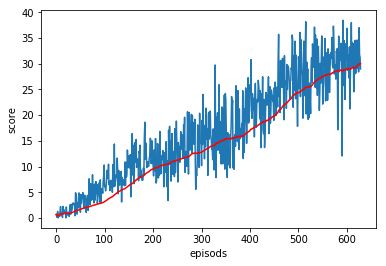

In [7]:

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg')
plt.ylabel('score')
plt.xlabel('episods')
plt.show()
